In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
print(df.shape)

(545, 13)


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# preprocessing

In [5]:
# Lbel Encoding cat-> numerical
binarry_map = {"yes": 1, "no": 0}
df["mainroad"] = df["mainroad"].map(binarry_map)
df["guestroom"] = df["guestroom"].map(binarry_map)
df["basement"] = df["basement"].map(binarry_map)
df["hotwaterheating"] = df["hotwaterheating"].map(binarry_map)
df["airconditioning"] = df["airconditioning"].map(binarry_map)
df["prefarea"] = df["prefarea"].map(binarry_map)
df["furnishingstatus"] = df["furnishingstatus"].map({"furnished": 1, "semi-furnished": 0.5, "unfurnished": 0})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


In [6]:
print(df.columns.tolist())

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [7]:
X = df.drop(columns=["price"])
y = df["price"]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,7420,4,1,2,1,1,1,0,1,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0.0
541,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,3620,2,1,1,1,0,0,0,0,0,0,0.0
543,2910,3,1,1,0,0,0,0,0,0,0,1.0


In [8]:
col=X.columns

for c in col:
    X[c]=(X[c]-X[c].mean())/X[c].std()

In [9]:
y=y.values.reshape(-1, 1)
X=X.values

# PCA functions

In [10]:
def pca_reconstruction_error(X, ks):
    
    # Step 1: Mean center
    mu = X.mean(axis=0)
    A = X - mu
    
    # Step 2: Compute A^T A
    ATA = A.T @ A
    
    # Step 3: Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(ATA)
    
    # Sort eigenvalues descending
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    errors = []
    for k in ks:
        # Step 4: Take top-k eigenvectors
        Ek = eigvecs[:, :k]
        
        # Step 5: Project & reconstruct
        W = A @ Ek         # projections
        L = W @ Ek.T       # linear combinations
        R = L + mu         # reconstructed points
        
        # Step 6: Compute error
        err = np.sum((X - R)**2)
        errors.append( err)
    return errors    
    


In [23]:
# redusing dimantions by pca
def PCA(X,k):

    mu = X.mean(axis=0)
    A = X - mu

    ATA = A.T @ A
    
    eigvals, eigvecs = np.linalg.eigh(ATA)
    
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    Ek = eigvecs[:, :k]
       
    W = A @ Ek      
    L = W @ Ek.T   
    R = L + mu 

    return W,R

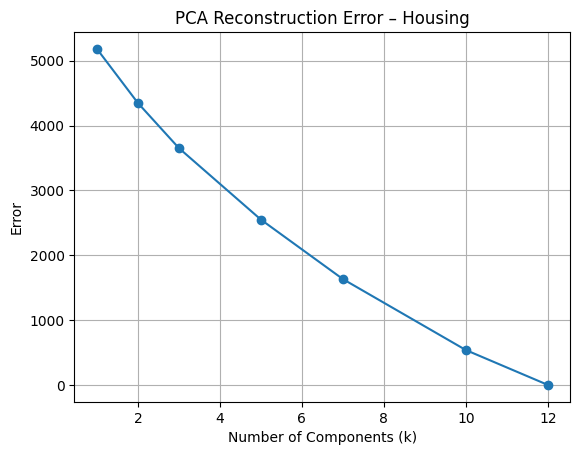

In [12]:
ks = [1,2,3,5,7,10,12]   # up to available features
error = pca_reconstruction_error(X, ks)
# print("Housing Reconstruction Errors:\n", house_res)

plt.plot(ks, error, marker="o")
plt.title("PCA Reconstruction Error – Housing")
plt.xlabel("Number of Components (k)")
plt.ylabel("Error")
plt.grid(True)
plt.show()


## ploting data into PCA 

In [ ]:

projections,_=PCA(X,2)
projections_3D,_=PCA(X,3)
projections
PCA_1_2D=projections[0]
PCA_2_2D=projections[1]

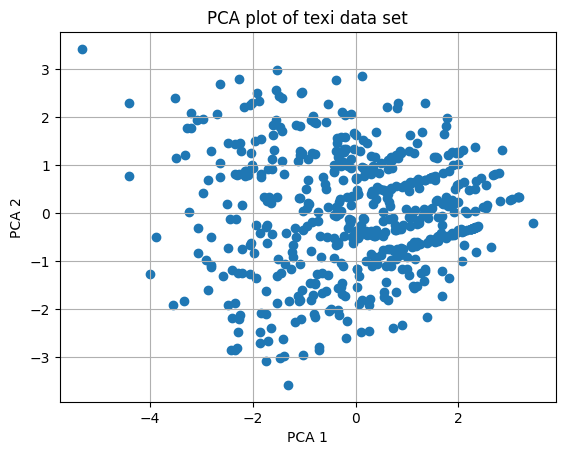

In [14]:


plt.scatter(PCA_1_2D,PCA_2_2D)
plt.title("PCA plot of texi data set")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

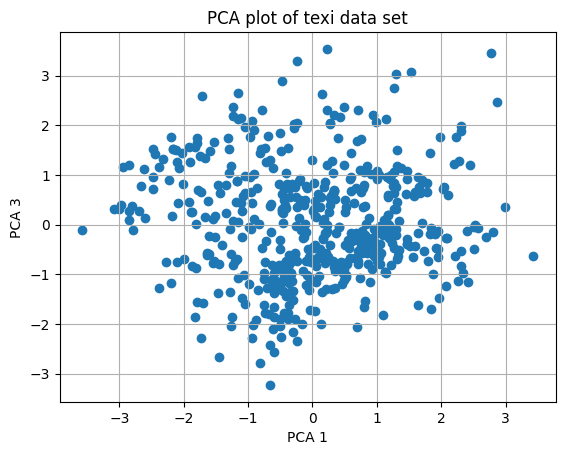

In [15]:

plt.scatter(projections_3D[1],projections_3D[2])
plt.title("PCA plot of texi data set")
plt.xlabel("PCA 1")
plt.ylabel("PCA 3")
plt.grid(True)
plt.show()

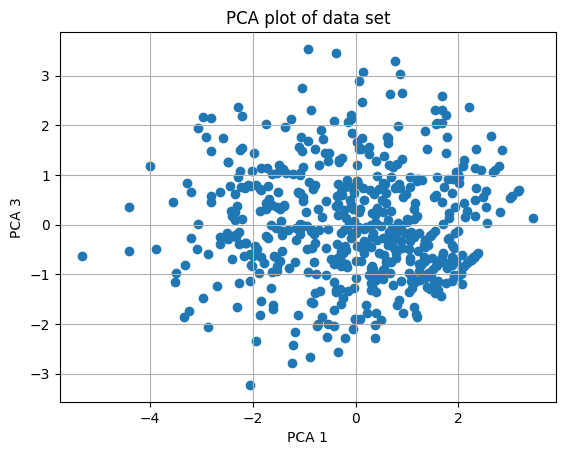

In [16]:

plt.scatter(projections_3D[0],projections_3D[2])
plt.title("PCA plot of data set")
plt.xlabel("PCA 1")
plt.ylabel("PCA 3")
plt.grid(True)
plt.show()

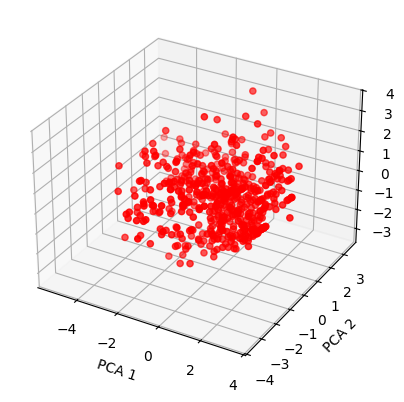

In [17]:
projections_3D
PCA_1_3D=projections_3D[0]
PCA_2_3D=projections_3D[1]
PCA_3_3D=projections_3D[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(projections_3D[0], projections_3D[1], projections_3D[2], c='r', marker='o')

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

plt.show()

In [18]:
fig = px.scatter_3d(projections_3D.T, x=0, y=1, z=2,size_max=5000)
fig.update_layout(
    title='My 3D Scatter Plot',
    scene=dict(
        xaxis_title='PCA 1',
        yaxis_title='PCA 2',
        zaxis_title='PCA 3'
    )
)
# Show plot
fig.show()

#  seeing diffrence in model  with and without PCA

## modle

In [19]:
def linear(X, y, alpha=0.01, epochs=1000):
    n_samples = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    loss_history = []

    for epoch in range(epochs):
        y_pred = X @ w
        error = y_pred - y
        loss = (1 / (2 * n_samples)) * np.sum(error ** 2)
        loss_history.append(loss)

        gradient = (1 / n_samples) * (X.T @ error)
        w -= alpha * gradient

    return w, loss_history


In [20]:
w_withoutPCA,loss_withoutPCA=linear(X, y, alpha=0.01, epochs=1000)

In [35]:
k=range(1,12)

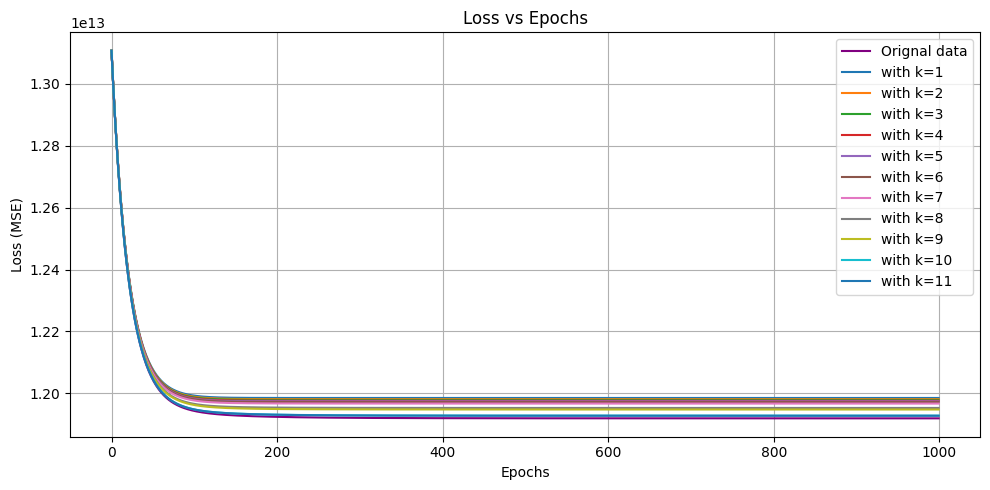

In [37]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(len(loss_withoutPCA)), y=loss_withoutPCA, label="Orignal data", color='purple')

for i in k:
    _,X_reconstructed=PCA(X,i)
    w_withPCA,loss_withPCA=linear(X_reconstructed, y, alpha=0.01, epochs=1000)
    sns.lineplot(x=range(len(loss_withPCA)), y=loss_withPCA, label=f"with k={i}")

plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()